# Project Prompt

In this project you must create a web service that uses machine learning to make predictions based on the data set powerproduction available on Moodle. The goal is to produce a model that accurately predicts wind turbine power output from wind speed values, as in the data set. You must then develop a web service that will respond with predicted power values based on speed values sent as HTTP requests. Your submission must be in the form of a git repository containing, at a minimum, the following items:
1. Jupyter notebook that trains a model using the data set. In the notebook you should explain your model and give an analysis of its accuracy.
2. Python script that runs a web service based on the model, as above.
3. Dockerfile to build and run the web service in a container.
4. Standard items in a git repository such as a README.
To enhance your submission, you might consider developing and comparing more than one model. Rest assured, all the above concepts will be explored in lecture videos and other materials in the coming semester.


# Approach




In [47]:
# Neural networks.
import tensorflow.keras as kr

# to split data into training and testing sets
from sklearn.model_selection import train_test_split

# for evaluating models
from sklearn import metrics

# Numerical arrays
import numpy as np

# Data frames.
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

# Plot style.
plt.style.use("ggplot")

# Make matplotlib show interactive plots in the notebook.
%matplotlib inline

# Plot size.
plt.rcParams['figure.figsize'] = [14, 8]

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv')
# the first and last few rows have power values of zero, so we increase the number displayed
pd.set_option('display.min_rows', 30)
df

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


Text(0, 0.5, 'power')

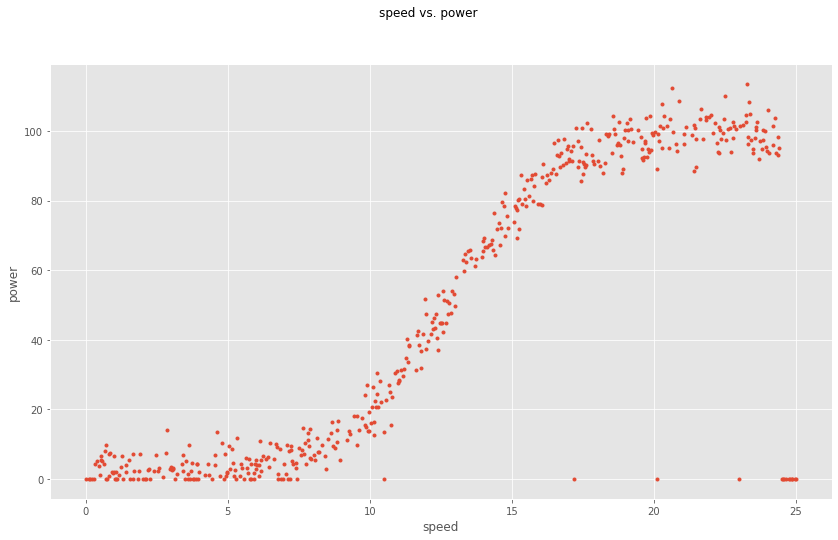

In [20]:
columns = df.columns
plt.plot(df[columns[0]], df[columns[1]], '.')
plt.suptitle(f'{columns[0]} vs. {columns[1]}')
plt.xlabel(f'{columns[0]}')
plt.ylabel(f'{columns[1]}')

We can immediately see that we are dealing with a [Sigmoid-like function](https://en.wikipedia.org/wiki/Sigmoid_function):



<img src="https://upload.wikimedia.org/wikipedia/commons/8/88/Logistic-curve.svg" width="400" height="500" align="left">

<br><br><br><br><br><br><br><br><br><br><br><br><br><br>

However, more relevant to our purpose is the even more basic fact that there is clearly a very strong relationship between speed and power, although it not linear but quadratic. The other important thing to notice is that there are a clear number of outliers in the sample where speed is relatively high but power is 0, and in particular, the last 10 points in the sample have power of zero, even though they have a very high speed value. Because these points clearly are not typical outliers in the sense that they all have the same y value and are so far from what we would expect them to be, there are really only three interpretations of their values:

1. They were incorrectly measured (perhaps the power values simply weren't recorded, and thus were entered as zero.

2. They values are accurate, and are explained by an external influence that over-rided the relationship between speed and power (e.g. perhaps their was no capacity on those days to store the electricity generated, so despite high speeds zero power was generated).

3. For speeds higher than a certain value, power is always zero.

Although the repeated zero values for power for the last ten points of the sample is suspicious, the most responsible response to these zero values would likely be to first include then as legitimate values, analyze their effect on the models, and then decide from there whether how to deal with them. For that reason I will not (at least a first) shed the sample of those points where speed is high but power is zero.



## 

In [155]:
# Create a neural network with one neuron.
model = kr.models.Sequential()
model.add(kr.layers.Dense(50, input_shape=(1,), activation="sigmoid", kernel_initializer='ones', bias_initializer='zeros'))
model.add(kr.layers.Dense(1, input_shape=(1,), activation="linear", kernel_initializer='ones', bias_initializer='zeros'))
model.compile(kr.optimizers.Adam(lr=0.0095), loss='mean_squared_error')

In [165]:
# split the dataset into training and testing data
# see here: https://realpython.com/train-test-split-python-data/
x_train, x_test, y_train, y_test = train_test_split(df[columns[0]][:490], df[columns[1]][:490], test_size=0.3)

In [166]:
# Train the neural network on our training data.
model.fit(x_train, y_train, epochs=500)

Epoch 1/500
11/11 [==============================] - 0s 1ms/step - loss: 98.2245
Epoch 2/500
11/11 [==============================] - 0s 1ms/step - loss: 97.5330
Epoch 3/500
11/11 [==============================] - 0s 1ms/step - loss: 98.0359
Epoch 4/500
11/11 [==============================] - 0s 1ms/step - loss: 99.6502
Epoch 5/500
11/11 [==============================] - 0s 2ms/step - loss: 99.5355
Epoch 6/500
11/11 [==============================] - 0s 2ms/step - loss: 98.9509
Epoch 7/500
11/11 [==============================] - 0s 2ms/step - loss: 98.1960
Epoch 8/500
11/11 [==============================] - 0s 2ms/step - loss: 99.1221
Epoch 9/500
11/11 [==============================] - 0s 2ms/step - loss: 97.7717
Epoch 10/500
11/11 [==============================] - 0s 1ms/step - loss: 97.9344
Epoch 11/500
11/11 [==============================] - 0s 2ms/step - loss: 97.8907
Epoch 12/500
11/11 [==============================] - 0s 2ms/step - loss: 97.7620
Epoch 13/500
11/11 [=====

Epoch 101/500
11/11 [==============================] - 0s 2ms/step - loss: 97.7250
Epoch 102/500
11/11 [==============================] - 0s 2ms/step - loss: 97.6398
Epoch 103/500
11/11 [==============================] - 0s 2ms/step - loss: 98.1201
Epoch 104/500
11/11 [==============================] - 0s 2ms/step - loss: 98.2606
Epoch 105/500
11/11 [==============================] - 0s 2ms/step - loss: 99.4533
Epoch 106/500
11/11 [==============================] - 0s 2ms/step - loss: 98.2761
Epoch 107/500
11/11 [==============================] - 0s 2ms/step - loss: 99.3587
Epoch 108/500
11/11 [==============================] - 0s 1ms/step - loss: 99.2597
Epoch 109/500
11/11 [==============================] - 0s 2ms/step - loss: 99.5000
Epoch 110/500
11/11 [==============================] - 0s 2ms/step - loss: 97.8894
Epoch 111/500
11/11 [==============================] - 0s 2ms/step - loss: 97.6524
Epoch 112/500
11/11 [==============================] - 0s 2ms/step - loss: 98.0914
Epoc

11/11 [==============================] - 0s 1ms/step - loss: 97.4263
Epoch 200/500
11/11 [==============================] - 0s 1ms/step - loss: 98.1291
Epoch 201/500
11/11 [==============================] - 0s 1ms/step - loss: 98.1523
Epoch 202/500
11/11 [==============================] - 0s 1ms/step - loss: 98.6673
Epoch 203/500
11/11 [==============================] - 0s 1ms/step - loss: 97.9025
Epoch 204/500
11/11 [==============================] - 0s 1ms/step - loss: 98.2877
Epoch 205/500
11/11 [==============================] - 0s 1ms/step - loss: 97.7817
Epoch 206/500
11/11 [==============================] - 0s 1ms/step - loss: 98.2037
Epoch 207/500
11/11 [==============================] - 0s 1ms/step - loss: 98.0134
Epoch 208/500
11/11 [==============================] - 0s 1ms/step - loss: 97.9551
Epoch 209/500
11/11 [==============================] - 0s 1ms/step - loss: 98.6512
Epoch 210/500
11/11 [==============================] - 0s 1ms/step - loss: 98.9266
Epoch 211/500
11/1

11/11 [==============================] - 0s 1ms/step - loss: 97.9903
Epoch 298/500
11/11 [==============================] - 0s 1ms/step - loss: 97.2167
Epoch 299/500
11/11 [==============================] - 0s 1ms/step - loss: 98.7219
Epoch 300/500
11/11 [==============================] - 0s 1ms/step - loss: 97.8775
Epoch 301/500
11/11 [==============================] - 0s 1ms/step - loss: 98.2139
Epoch 302/500
11/11 [==============================] - 0s 1ms/step - loss: 98.3129
Epoch 303/500
11/11 [==============================] - 0s 1ms/step - loss: 98.6277
Epoch 304/500
11/11 [==============================] - 0s 1ms/step - loss: 98.2161
Epoch 305/500
11/11 [==============================] - 0s 1ms/step - loss: 97.7629
Epoch 306/500
11/11 [==============================] - 0s 1ms/step - loss: 97.7612
Epoch 307/500
11/11 [==============================] - 0s 1ms/step - loss: 98.3971
Epoch 308/500
11/11 [==============================] - 0s 1ms/step - loss: 98.5591
Epoch 309/500
11/1

11/11 [==============================] - 0s 1ms/step - loss: 98.0637
Epoch 396/500
11/11 [==============================] - 0s 1ms/step - loss: 97.7939
Epoch 397/500
11/11 [==============================] - 0s 1ms/step - loss: 97.4143
Epoch 398/500
11/11 [==============================] - 0s 1ms/step - loss: 97.5144
Epoch 399/500
11/11 [==============================] - 0s 1ms/step - loss: 97.5611
Epoch 400/500
11/11 [==============================] - 0s 1ms/step - loss: 98.2512
Epoch 401/500
11/11 [==============================] - 0s 1ms/step - loss: 97.7798
Epoch 402/500
11/11 [==============================] - 0s 1ms/step - loss: 97.8852
Epoch 403/500
11/11 [==============================] - 0s 1ms/step - loss: 98.6782
Epoch 404/500
11/11 [==============================] - 0s 1ms/step - loss: 98.3326
Epoch 405/500
11/11 [==============================] - 0s 1ms/step - loss: 97.9457
Epoch 406/500
11/11 [==============================] - 0s 1ms/step - loss: 97.6869
Epoch 407/500
11/1

11/11 [==============================] - 0s 1ms/step - loss: 98.2161
Epoch 494/500
11/11 [==============================] - 0s 1ms/step - loss: 97.6493
Epoch 495/500
11/11 [==============================] - 0s 1ms/step - loss: 97.6727
Epoch 496/500
11/11 [==============================] - 0s 1ms/step - loss: 98.0231
Epoch 497/500
11/11 [==============================] - 0s 1ms/step - loss: 98.1830
Epoch 498/500
11/11 [==============================] - 0s 1ms/step - loss: 97.5591
Epoch 499/500
11/11 [==============================] - 0s 1ms/step - loss: 97.9861
Epoch 500/500
11/11 [==============================] - 0s 1ms/step - loss: 97.8295


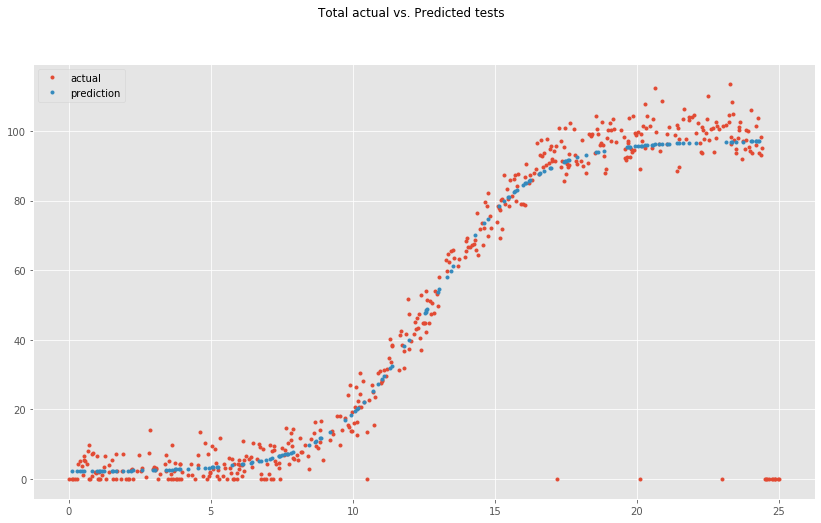

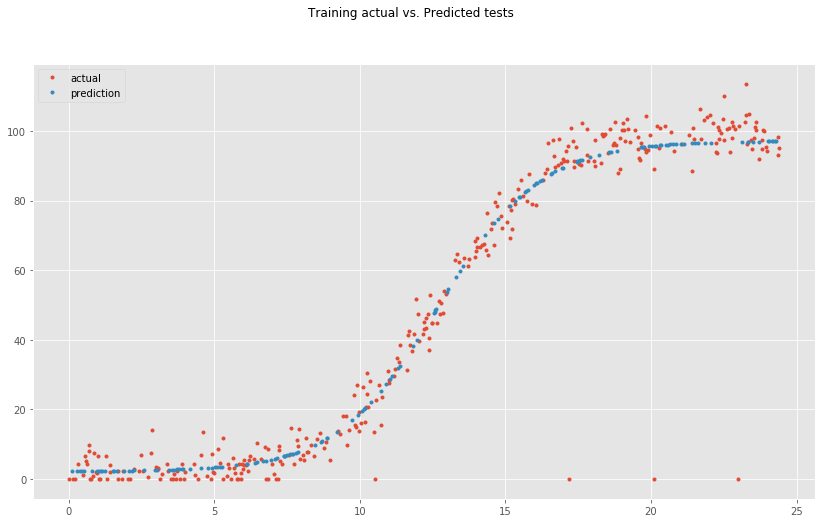

In [168]:
# Now let's see.
plt.plot(df[columns[0]], df[columns[1]], '.', label='actual')
plt.plot(x_test, model.predict(x_test), '.', label='prediction')
plt.suptitle("Total actual vs. Predicted tests")
plt.legend()
plt.show()

# Now let's see.
plt.plot(x_train, y_train, '.', label='actual')
plt.plot(x_test, model.predict(x_test), '.', label='prediction')
plt.suptitle("Training actual vs. Predicted tests")
plt.legend()
plt.show()

In [167]:
predictions = model.predict(x_test)

print("Root mean squared error:")
print(metrics.mean_squared_error(y_test, predictions))

Root mean squared error:
21.190290510520178


Our model has a root mean square error of almost 100 when operating on our training set, it has a lower error value of around 20 on our testing set. This is a good indication that we haven't overfitted our model. What is interesting is for values of speed greater than around 16, our model appears to consistently underestimate power. This is possibly due to thethree data points that have speed values of greater than 16 but power values of zero. If we remove those values from the dataset, we will likely get a 'better fitting' model. We can try this now, although even if we arrive at a better model, the removal of those anomolous data points is still not likely justified, as they may indeed be legimitate values that will simply be intractable for a model that only looks as speed and power

In [197]:
newDF = df.loc[(df['speed']<16) | (df['power']!=0)]
newDF

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


In [198]:
# split the dataset into training and testing data
# see here: https://realpython.com/train-test-split-python-data/
x_train, x_test, y_train, y_test = train_test_split(newDF[columns[0]], newDF[columns[1]], test_size=0.3)

In [199]:
# Train the neural network on our training data.
model.fit(x_train, y_train, epochs=500)

Epoch 1/500
11/11 [==============================] - 0s 3ms/step - loss: 17.6179
Epoch 2/500
11/11 [==============================] - 0s 2ms/step - loss: 16.4361
Epoch 3/500
11/11 [==============================] - 0s 2ms/step - loss: 16.2836
Epoch 4/500
11/11 [==============================] - 0s 2ms/step - loss: 16.3202
Epoch 5/500
11/11 [==============================] - 0s 2ms/step - loss: 16.1542
Epoch 6/500
11/11 [==============================] - 0s 2ms/step - loss: 16.2970
Epoch 7/500
11/11 [==============================] - 0s 2ms/step - loss: 16.2514
Epoch 8/500
11/11 [==============================] - 0s 3ms/step - loss: 16.3170
Epoch 9/500
11/11 [==============================] - 0s 2ms/step - loss: 16.5348
Epoch 10/500
11/11 [==============================] - 0s 2ms/step - loss: 16.7331
Epoch 11/500
11/11 [==============================] - 0s 2ms/step - loss: 16.3226
Epoch 12/500
11/11 [==============================] - 0s 2ms/step - loss: 16.5157
Epoch 13/500
11/11 [=====

11/11 [==============================] - 0s 1ms/step - loss: 16.2973
Epoch 102/500
11/11 [==============================] - 0s 1ms/step - loss: 16.4805
Epoch 103/500
11/11 [==============================] - 0s 1ms/step - loss: 16.4792
Epoch 104/500
11/11 [==============================] - 0s 1ms/step - loss: 16.2455
Epoch 105/500
11/11 [==============================] - 0s 1ms/step - loss: 16.1253
Epoch 106/500
11/11 [==============================] - 0s 2ms/step - loss: 16.1493
Epoch 107/500
11/11 [==============================] - 0s 2ms/step - loss: 16.5954
Epoch 108/500
11/11 [==============================] - 0s 1ms/step - loss: 16.4560
Epoch 109/500
11/11 [==============================] - 0s 2ms/step - loss: 16.1820
Epoch 110/500
11/11 [==============================] - 0s 1ms/step - loss: 16.1500
Epoch 111/500
11/11 [==============================] - 0s 1ms/step - loss: 16.2811
Epoch 112/500
11/11 [==============================] - 0s 1ms/step - loss: 16.2673
Epoch 113/500
11/1

11/11 [==============================] - 0s 1ms/step - loss: 16.6136
Epoch 200/500
11/11 [==============================] - 0s 1ms/step - loss: 16.4957
Epoch 201/500
11/11 [==============================] - 0s 1ms/step - loss: 16.4312
Epoch 202/500
11/11 [==============================] - 0s 1ms/step - loss: 16.1382
Epoch 203/500
11/11 [==============================] - 0s 1ms/step - loss: 16.0216
Epoch 204/500
11/11 [==============================] - 0s 1ms/step - loss: 16.1917
Epoch 205/500
11/11 [==============================] - 0s 1ms/step - loss: 16.4007
Epoch 206/500
11/11 [==============================] - 0s 1ms/step - loss: 16.2767
Epoch 207/500
11/11 [==============================] - 0s 1ms/step - loss: 16.3069
Epoch 208/500
11/11 [==============================] - 0s 997us/step - loss: 16.0416
Epoch 209/500
11/11 [==============================] - 0s 1ms/step - loss: 16.1590
Epoch 210/500
11/11 [==============================] - 0s 1ms/step - loss: 16.2777
Epoch 211/500
11

11/11 [==============================] - 0s 1ms/step - loss: 16.0925
Epoch 298/500
11/11 [==============================] - 0s 1ms/step - loss: 16.1849
Epoch 299/500
11/11 [==============================] - 0s 1ms/step - loss: 16.1480
Epoch 300/500
11/11 [==============================] - 0s 997us/step - loss: 16.1599
Epoch 301/500
11/11 [==============================] - 0s 1ms/step - loss: 16.2834
Epoch 302/500
11/11 [==============================] - 0s 1ms/step - loss: 16.3061
Epoch 303/500
11/11 [==============================] - 0s 1ms/step - loss: 16.8423
Epoch 304/500
11/11 [==============================] - 0s 1ms/step - loss: 16.8796
Epoch 305/500
11/11 [==============================] - 0s 1ms/step - loss: 16.3673
Epoch 306/500
11/11 [==============================] - 0s 1ms/step - loss: 16.1965
Epoch 307/500
11/11 [==============================] - 0s 1ms/step - loss: 16.3001
Epoch 308/500
11/11 [==============================] - 0s 1ms/step - loss: 16.1983
Epoch 309/500
11

11/11 [==============================] - 0s 1ms/step - loss: 16.1032
Epoch 396/500
11/11 [==============================] - 0s 2ms/step - loss: 16.5204
Epoch 397/500
11/11 [==============================] - 0s 2ms/step - loss: 17.4863
Epoch 398/500
11/11 [==============================] - 0s 2ms/step - loss: 17.8540
Epoch 399/500
11/11 [==============================] - 0s 2ms/step - loss: 16.6227
Epoch 400/500
11/11 [==============================] - 0s 2ms/step - loss: 16.3952
Epoch 401/500
11/11 [==============================] - 0s 2ms/step - loss: 16.1235
Epoch 402/500
11/11 [==============================] - 0s 2ms/step - loss: 16.2833
Epoch 403/500
11/11 [==============================] - 0s 2ms/step - loss: 16.6987
Epoch 404/500
11/11 [==============================] - 0s 2ms/step - loss: 16.9500
Epoch 405/500
11/11 [==============================] - 0s 2ms/step - loss: 16.3428
Epoch 406/500
11/11 [==============================] - 0s 2ms/step - loss: 16.5718
Epoch 407/500
11/1

11/11 [==============================] - 0s 2ms/step - loss: 16.0831
Epoch 494/500
11/11 [==============================] - 0s 1ms/step - loss: 16.1664
Epoch 495/500
11/11 [==============================] - 0s 1ms/step - loss: 16.2970
Epoch 496/500
11/11 [==============================] - 0s 1ms/step - loss: 16.4371
Epoch 497/500
11/11 [==============================] - 0s 2ms/step - loss: 16.4558
Epoch 498/500
11/11 [==============================] - 0s 1ms/step - loss: 16.4556
Epoch 499/500
11/11 [==============================] - 0s 1ms/step - loss: 16.2650
Epoch 500/500
11/11 [==============================] - 0s 1ms/step - loss: 16.1019


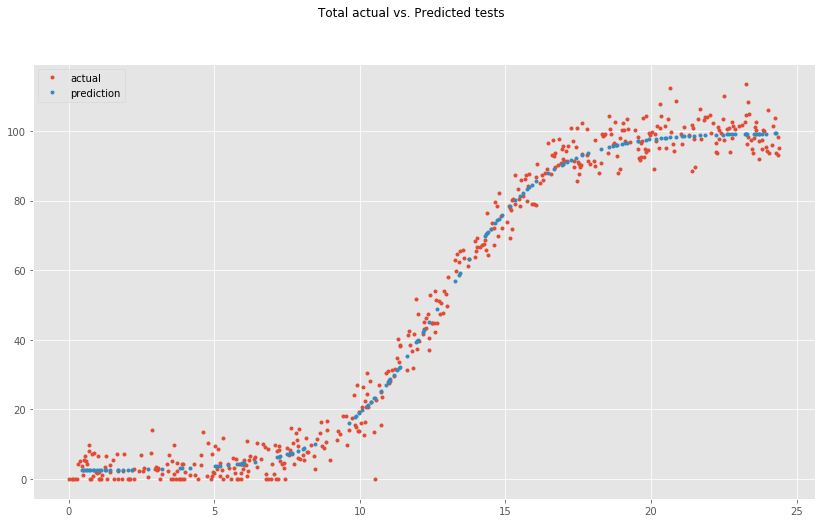

In [200]:
# Now let's see.
plt.plot(newDF[columns[0]], newDF[columns[1]], '.', label='actual')
plt.plot(x_test, model.predict(x_test), '.', label='prediction')
plt.suptitle("Total actual vs. Predicted tests")
plt.legend()
plt.show()

In [201]:
predictions = model.predict(x_test)

print("Root mean squared error:")
print(metrics.mean_squared_error(y_test, predictions))

Root mean squared error:
22.452878021649113


On this occasion, the loss on the training set is much less, and the testing set has similar levels of loss. If we look at the graph, the underestimating of power when speed is greater than 16 has mostly disappeared. We thus appear to have a better model, but only if we assume that the zero-power points we removed were illegitimate measurements, and that does not appear to be a legitimate assumption.